# Code used to download, map and analyze data for each city
**Note the same process was used 5 times - once for each city**
**Data cleaning of category names was done in separate notebook utlizing regex**

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'TX13AZMBPPXX0AOVGECJ0IXSYEUYRGRM0NBPHUAZDUN4WJSL' # your Foursquare ID
CLIENT_SECRET = '2Z35HCF1HMLM4WEOEGJWNIDSZK3CFO2IMPFV2YSUSASHXYEZ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TX13AZMBPPXX0AOVGECJ0IXSYEUYRGRM0NBPHUAZDUN4WJSL
CLIENT_SECRET:2Z35HCF1HMLM4WEOEGJWNIDSZK3CFO2IMPFV2YSUSASHXYEZ


In [35]:
address = 'Boise'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6166163 -116.200886


Search nearby retail location as reference

In [36]:
search_query = 'West Elm'
radius = 500
print(search_query + ' .... OK!')

West Elm .... OK!


Create URL object for venue search

In [37]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=TX13AZMBPPXX0AOVGECJ0IXSYEUYRGRM0NBPHUAZDUN4WJSL&client_secret=2Z35HCF1HMLM4WEOEGJWNIDSZK3CFO2IMPFV2YSUSASHXYEZ&ll=43.6166163,-116.200886&v=20180604&query=West Elm&radius=500&limit=100'

get URL request from Foursquare

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef610bc4153fb462952ffcf'},
 'response': {'venues': [{'id': '5761b4c6498e5f3e8a4ac274',
    'name': 'West Elm',
    'location': {'address': '824 W Idaho St',
     'lat': 43.617053,
     'lng': -116.203373,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.617053,
       'lng': -116.203373},
      {'label': 'entrance', 'lat': 43.616832, 'lng': -116.203405}],
     'distance': 206,
     'postalCode': '83702',
     'cc': 'US',
     'city': 'Boise',
     'state': 'ID',
     'country': 'United States',
     'formattedAddress': ['824 W Idaho St',
      'Boise, ID 83702',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f8941735',
      'name': 'Furniture / Home Store',
      'pluralName': 'Furniture / Home Stores',
      'shortName': 'Furniture / Home',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/furniture_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1593184949',
    'h

assign relevant part of JSON to venues
tranform venues into a dataframe

In [40]:
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,5761b4c6498e5f3e8a4ac274,West Elm,"[{'id': '4bf58dd8d48988d1f8941735', 'name': 'F...",v-1593184949,False,824 W Idaho St,43.617053,-116.203373,"[{'label': 'display', 'lat': 43.617053, 'lng':...",206,83702,US,Boise,ID,United States,"[824 W Idaho St, Boise, ID 83702, United States]",NaN,NaN
1,4c106d13ce57c9283ff481d2,Mountain West Bank,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",v-1593184949,False,802 W Bannock St Ste 1100,43.617545,-116.202110,"[{'label': 'display', 'lat': 43.617545, 'lng':...",142,83702,US,Boise,ID,United States,"[802 W Bannock St Ste 1100 (8th Street), Boise...",8th Street,NaN
2,586413338ab03f69fea1badc,West Legal Offices PLLC,"[{'id': '52f2ab2ebcbc57f1066b8b3f', 'name': 'L...",v-1593184949,False,1020 W Main St #385,43.617435,-116.206374,"[{'label': 'display', 'lat': 43.6174347, 'lng'...",451,83702,US,Boise,ID,United States,"[1020 W Main St #385, Boise, ID 83702, United ...",NaN,475256050
3,4e137073c65b4a49f31f0f36,Bank of the West,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",v-1593184949,False,827 W Idaho St,43.616706,-116.203922,"[{'label': 'display', 'lat': 43.616706, 'lng':...",244,83702,US,Boise,ID,United States,"[827 W Idaho St, Boise, ID 83702, United States]",NaN,NaN
4,4d079a8a37036dcb089f22fb,WestWater Research LLC,"[{'id': '4bf58dd8d48988d174941735', 'name': 'C...",v-1593184949,False,Empire Building,43.617807,-116.202218,"[{'label': 'display', 'lat': 43.617807, 'lng':...",170,NaN,US,Boise,ID,United States,"[Empire Building (10th & Idaho), Boise, ID, Un...",10th & Idaho,NaN


Keep only columns that include venue name, and anything that is associated with location

In [41]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

function that extracts the category of the venue
filter the category for each row
clean column names by keeping only last term

In [42]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)


dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,West Elm,Furniture / Home Store,824 W Idaho St,43.617053,-116.203373,"[{'label': 'display', 'lat': 43.617053, 'lng':...",206,83702,US,Boise,ID,United States,"[824 W Idaho St, Boise, ID 83702, United States]",NaN,5761b4c6498e5f3e8a4ac274
1,Mountain West Bank,Bank,802 W Bannock St Ste 1100,43.617545,-116.202110,"[{'label': 'display', 'lat': 43.617545, 'lng':...",142,83702,US,Boise,ID,United States,"[802 W Bannock St Ste 1100 (8th Street), Boise...",8th Street,4c106d13ce57c9283ff481d2
2,West Legal Offices PLLC,Lawyer,1020 W Main St #385,43.617435,-116.206374,"[{'label': 'display', 'lat': 43.6174347, 'lng'...",451,83702,US,Boise,ID,United States,"[1020 W Main St #385, Boise, ID 83702, United ...",NaN,586413338ab03f69fea1badc
3,Bank of the West,Bank,827 W Idaho St,43.616706,-116.203922,"[{'label': 'display', 'lat': 43.616706, 'lng':...",244,83702,US,Boise,ID,United States,"[827 W Idaho St, Boise, ID 83702, United States]",NaN,4e137073c65b4a49f31f0f36
4,WestWater Research LLC,Coworking Space,Empire Building,43.617807,-116.202218,"[{'label': 'display', 'lat': 43.617807, 'lng':...",170,NaN,US,Boise,ID,United States,"[Empire Building (10th & Idaho), Boise, ID, Un...",10th & Idaho,4d079a8a37036dcb089f22fb
5,Ida-West Energy,Office,210 N 10th St,43.617745,-116.202796,"[{'label': 'display', 'lat': 43.61774507568393...",198,83702,US,Boise,ID,United States,"[210 N 10th St (Idaho), Boise, ID 83702, Unite...",Idaho,50328135e4b0a9ac007e0ced
6,Westward Coffee and Supply,Coffee Shop,850 W Main St,43.616371,-116.203823,"[{'label': 'display', 'lat': 43.616371, 'lng':...",238,83702,US,Boise,ID,United States,"[850 W Main St, Boise, ID 83702, United States]",NaN,57acbf3dcd10027471ad5e55
7,Western Exterminator,Home Service,"950 Bannock St, Ste 1100",43.618423,-116.203970,"[{'label': 'display', 'lat': 43.61842303469444...",319,83702,US,Boise,ID,United States,"[950 Bannock St, Ste 1100, Boise, ID 83702, Un...",NaN,591b2219916bc12edf9b710c
8,Bus Stop State & 11th West,Bus Stop,NaN,43.620413,-116.203888,"[{'label': 'display', 'lat': 43.620413, 'lng':...",486,83702,US,Boise,ID,United States,"[Boise, ID 83702, United States]",NaN,58dae172c5f8a714c3c223f3
9,Great Western BBQ Supply,BBQ Joint,106 N 6th St,43.614517,-116.200920,"[{'label': 'display', 'lat': 43.614517, 'lng':...",233,83702,US,Boise,ID,United States,"[106 N 6th St, Boise, ID 83702, United States]",NaN,4f32881a19836c91c7e0f446


Enter in venue id for nearby venue

In [43]:
venue_id = '5761b4c6498e5f3e8a4ac274'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/5761b4c6498e5f3e8a4ac274?client_id=TX13AZMBPPXX0AOVGECJ0IXSYEUYRGRM0NBPHUAZDUN4WJSL&client_secret=2Z35HCF1HMLM4WEOEGJWNIDSZK3CFO2IMPFV2YSUSASHXYEZ&v=20180604'

Get results for venue details

In [44]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])


{'id': '5761b4c6498e5f3e8a4ac274',
 'name': 'West Elm',
 'contact': {},
 'location': {'address': '824 W Idaho St',
  'lat': 43.617053,
  'lng': -116.203373,
  'labeledLatLngs': [{'label': 'display',
    'lat': 43.617053,
    'lng': -116.203373},
   {'label': 'entrance', 'lat': 43.616832, 'lng': -116.203405}],
  'postalCode': '83702',
  'cc': 'US',
  'city': 'Boise',
  'state': 'ID',
  'country': 'United States',
  'formattedAddress': ['824 W Idaho St', 'Boise, ID 83702', 'United States']},
 'canonicalUrl': 'https://foursquare.com/v/west-elm/5761b4c6498e5f3e8a4ac274',
 'categories': [{'id': '4bf58dd8d48988d1f8941735',
   'name': 'Furniture / Home Store',
   'pluralName': 'Furniture / Home Stores',
   'shortName': 'Furniture / Home',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/furniture_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 0},
 'likes': {'count': 0, 'groups': []},
 'dislike': False,
 'ok': False,
 'rating': 7.4

Use new lat, long to explore data

In [45]:
latitude = 43.617053
longitude = -116.203373

In [46]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=TX13AZMBPPXX0AOVGECJ0IXSYEUYRGRM0NBPHUAZDUN4WJSL&client_secret=2Z35HCF1HMLM4WEOEGJWNIDSZK3CFO2IMPFV2YSUSASHXYEZ&ll=43.617053,-116.203373&v=20180604&radius=500&limit=100'

get data from url and convert to dataframe, filtering for categories

In [47]:
import requests

In [48]:
results = requests.get(url).json()

In [50]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Bittercreek Ale House,Bar,246 N 8th St,at W. Idaho St.,43.616612,-116.202501,"[{'label': 'display', 'lat': 43.61661248396162...",85,83702,US,Boise,ID,United States,"[246 N 8th St (at W. Idaho St.), Boise, ID 837...",NaN,4bad27aaf964a5207e333be3
1,Fork,American Restaurant,199 N 8th St,Idaho,43.616400,-116.202743,"[{'label': 'display', 'lat': 43.61639983692314...",88,83702,US,Boise,ID,United States,"[199 N 8th St (Idaho), Boise, ID 83702, United...",NaN,4d4b730305556ea8d862a828
2,10 Barrel Brewing,Brewery,830 W Bannock St,at N 9th St,43.617764,-116.202886,"[{'label': 'display', 'lat': 43.61776402451569...",88,83702,US,Boise,ID,United States,"[830 W Bannock St (at N 9th St), Boise, ID 837...",NaN,514a3386e4b034cf090ebfba
3,Freak Alley,Art Gallery,NaN,NaN,43.617381,-116.203269,"[{'label': 'display', 'lat': 43.61738122876555...",37,NaN,US,NaN,Idaho,United States,"[Idaho, United States]",NaN,4e20e1d17d8b71715ba5c456
4,Àlavita,Italian Restaurant,807 W Idaho St,at 8th St,43.616636,-116.203150,"[{'label': 'display', 'lat': 43.61663568587164...",49,83702,US,Boise,ID,United States,"[807 W Idaho St (at 8th St), Boise, ID 83702, ...",NaN,50e4c1f3e4b08ec8f660dfe1
5,Taj Mahal,Indian Restaurant,150 N 8th St Ste 222,W. Idaho St.,43.616029,-116.203112,"[{'label': 'display', 'lat': 43.61602948615118...",115,83702,US,Boise,ID,United States,"[150 N 8th St Ste 222 (W. Idaho St.), Boise, I...",NaN,4b59f5a7f964a520d9a328e3
6,Taphouse,Sports Bar,760 W Main St,NaN,43.615330,-116.203014,"[{'label': 'display', 'lat': 43.61533030794690...",193,83702,US,Boise,ID,United States,"[760 W Main St, Boise, ID 83702, United States]",NaN,4f061f2177c8f87cd21c87f3
7,John Berryhill's Bacon,Café,915 W Idaho St.,at 9th St.,43.617228,-116.204756,"[{'label': 'display', 'lat': 43.6172280804202,...",113,83702,US,Boise,ID,United States,"[915 W Idaho St. (at 9th St.), Boise, ID 83702...",NaN,4dd3ef1eb0fbf653b6487ea7
8,Asiago's,Italian Restaurant,1002 W Main St,NaN,43.617061,-116.205940,"[{'label': 'display', 'lat': 43.617061, 'lng':...",206,83702,US,Boise,ID,United States,"[1002 W Main St, Boise, ID 83702, United States]",NaN,4b5df4c2f964a520e27529e3
9,Rediscovered Bookshop,Bookstore,180 N 8th St,W. Idaho St.,43.616171,-116.202854,"[{'label': 'display', 'lat': 43.61617095642575...",106,83702,US,Boise,ID,United States,"[180 N 8th St (W. Idaho St.), Boise, ID 83702,...",NaN,4c44b1a3f05e9521b227e4b3


map finding of nearby venues with folium

In [64]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around Ecco


folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='West Elm',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng in zip(dataframe_filtered.lat, dataframe_filtered.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

Import data from csv to dataframe (previously saved between sessions)

In [77]:
df = pd.read_csv("BoiseData.csv")

In [78]:
df

,Unnamed: 0,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,0,Bittercreek Ale House,Bar,246 N 8th St,at W. Idaho St.,43.616612,-116.202501,"[{'label': 'display', 'lat': 43.61661248396162...",85,83702.0,US,Boise,ID,United States,"['246 N 8th St (at W. Idaho St.)', 'Boise, ID ...",NaN,4bad27aaf964a5207e333be3
1,1,Fork,Restaurant,199 N 8th St,Idaho,43.616400,-116.202744,"[{'label': 'display', 'lat': 43.61639983692314...",88,83702.0,US,Boise,ID,United States,"['199 N 8th St (Idaho)', 'Boise, ID 83702', 'U...",NaN,4d4b730305556ea8d862a828
2,2,10 Barrel Brewing,Brewery,830 W Bannock St,at N 9th St,43.617764,-116.202887,"[{'label': 'display', 'lat': 43.61776402451569...",88,83702.0,US,Boise,ID,United States,"['830 W Bannock St (at N 9th St)', 'Boise, ID ...",NaN,514a3386e4b034cf090ebfba
3,3,Freak Alley,Art Gallery,NaN,NaN,43.617381,-116.203269,"[{'label': 'display', 'lat': 43.61738122876555...",37,NaN,US,NaN,Idaho,United States,"['Idaho', 'United States']",NaN,4e20e1d17d8b71715ba5c456
4,4,Àlavita,Restaurant,807 W Idaho St,at 8th St,43.616636,-116.203150,"[{'label': 'display', 'lat': 43.61663568587164...",49,83702.0,US,Boise,ID,United States,"['807 W Idaho St (at 8th St)', 'Boise, ID 8370...",NaN,50e4c1f3e4b08ec8f660dfe1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,Office Depot,Shop,722 W Broad St,at Capitol,43.612986,-116.204640,"[{'label': 'display', 'lat': 43.6129858, 'lng'...",464,83702.0,US,Boise,ID,United States,"['722 W Broad St (at Capitol)', 'Boise, ID 837...",NaN,4b6c4804f964a5208b2d2ce3
72,72,Silly Birch,Bar,507 W Main St,5th,43.614047,-116.200487,"[{'label': 'display', 'lat': 43.61404709268373...",407,83702.0,US,Boise,ID,United States,"['507 W Main St (5th)', 'Boise, ID 83702', 'Un...",NaN,500a0ea0e4b0a62ff420942c
73,73,Piece Unique,Shop,408 S 8th St,Broad,43.612914,-116.205576,"[{'label': 'display', 'lat': 43.612914, 'lng':...",493,83702.0,US,Boise,ID,United States,"['408 S 8th St (Broad)', 'Boise, ID 83702', 'U...",NaN,4c69aea68e7c0f479f49e00f
74,74,Cole Marr Coffee House,Coffee Cafe,404 S 8th St #154,Broad St,43.612914,-116.205576,"[{'label': 'display', 'lat': 43.612914, 'lng':...",493,83702.0,US,Boise,ID,United States,"['404 S 8th St #154 (Broad St)', 'Boise, ID 83...",NaN,4b7c3b29f964a52000862fe3


Import Dependencies 

In [71]:
import pandas as pd
import numpy as npimport 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Filter to Top 5 categories

In [79]:

array = ['Restaurant', 'Bar', 'Hotel', 'Coffee Cafe', 'Shop']


In [81]:
top5 = df.loc[df['categories'].isin(array)]
top5

,Unnamed: 0,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,0,Bittercreek Ale House,Bar,246 N 8th St,at W. Idaho St.,43.616612,-116.202501,"[{'label': 'display', 'lat': 43.61661248396162...",85,83702.0,US,Boise,ID,United States,"['246 N 8th St (at W. Idaho St.)', 'Boise, ID ...",NaN,4bad27aaf964a5207e333be3
1,1,Fork,Restaurant,199 N 8th St,Idaho,43.616400,-116.202744,"[{'label': 'display', 'lat': 43.61639983692314...",88,83702.0,US,Boise,ID,United States,"['199 N 8th St (Idaho)', 'Boise, ID 83702', 'U...",NaN,4d4b730305556ea8d862a828
4,4,Àlavita,Restaurant,807 W Idaho St,at 8th St,43.616636,-116.203150,"[{'label': 'display', 'lat': 43.61663568587164...",49,83702.0,US,Boise,ID,United States,"['807 W Idaho St (at 8th St)', 'Boise, ID 8370...",NaN,50e4c1f3e4b08ec8f660dfe1
5,5,Taj Mahal,Restaurant,150 N 8th St Ste 222,W. Idaho St.,43.616029,-116.203112,"[{'label': 'display', 'lat': 43.61602948615118...",115,83702.0,US,Boise,ID,United States,"['150 N 8th St Ste 222 (W. Idaho St.)', 'Boise...",NaN,4b59f5a7f964a520d9a328e3
6,6,Taphouse,Bar,760 W Main St,NaN,43.615330,-116.203014,"[{'label': 'display', 'lat': 43.61533030794690...",193,83702.0,US,Boise,ID,United States,"['760 W Main St', 'Boise, ID 83702', 'United S...",NaN,4f061f2177c8f87cd21c87f3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,Office Depot,Shop,722 W Broad St,at Capitol,43.612986,-116.204640,"[{'label': 'display', 'lat': 43.6129858, 'lng'...",464,83702.0,US,Boise,ID,United States,"['722 W Broad St (at Capitol)', 'Boise, ID 837...",NaN,4b6c4804f964a5208b2d2ce3
72,72,Silly Birch,Bar,507 W Main St,5th,43.614047,-116.200487,"[{'label': 'display', 'lat': 43.61404709268373...",407,83702.0,US,Boise,ID,United States,"['507 W Main St (5th)', 'Boise, ID 83702', 'Un...",NaN,500a0ea0e4b0a62ff420942c
73,73,Piece Unique,Shop,408 S 8th St,Broad,43.612914,-116.205576,"[{'label': 'display', 'lat': 43.612914, 'lng':...",493,83702.0,US,Boise,ID,United States,"['408 S 8th St (Broad)', 'Boise, ID 83702', 'U...",NaN,4c69aea68e7c0f479f49e00f
74,74,Cole Marr Coffee House,Coffee Cafe,404 S 8th St #154,Broad St,43.612914,-116.205576,"[{'label': 'display', 'lat': 43.612914, 'lng':...",493,83702.0,US,Boise,ID,United States,"['404 S 8th St #154 (Broad St)', 'Boise, ID 83...",NaN,4b7c3b29f964a52000862fe3


Plot data in bar chart

dfplot = top5['categories'].value_counts()[:5].plot(kind='bar', title = 'Boise Popular Venues')

In [ ]:
Plot data in bar chart

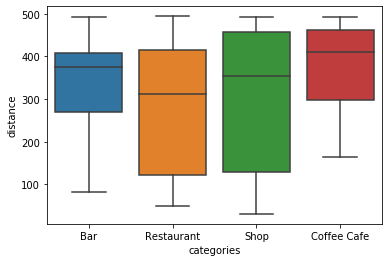

In [83]:
sns.boxplot(x="categories", y="distance", data=top5)